In [27]:
from A2b_rhl72 import * 
import numpy as np
import matplotlib.pyplot as plt

# 1a

In [28]:
def randtimes(N, t1, t2):
    """
    Simulate a Poisson process 

    N - number of random times

    [ t1 , t2 ] - time interval
    """
    random_times = [random.uniform(t1,t2) for _ in range(N)]
    return random_times

def plotflash(times):
    """
    Plot the given times as a stem plot with unit heights.
    """
    plt.stem(times, [1] * len(times), markerfmt='')
    plt.xlabel('Time')
    plt.ylabel('Event Height')
    plt.title('Stem Plot of Random Times')
    plt.show()

q1

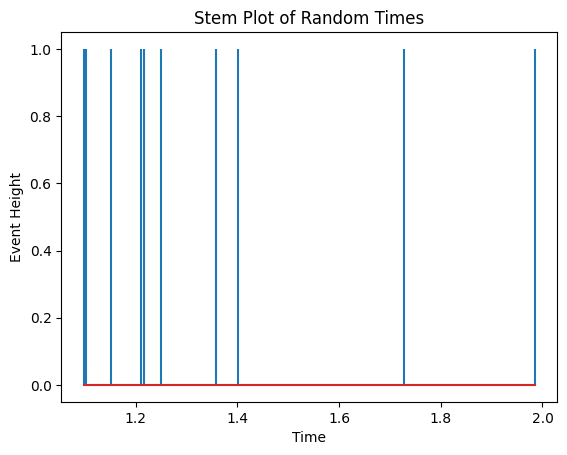

In [29]:
t = randtimes(10, t1=1, t2=2)
plotflash(t)

# 1b

In [30]:
def randintervals(N, lambd, t1):
    """
    Generate N random time intervals from t1 with lambda rate.
    """
    intervals = np.random.exponential(scale=1.0/lambd, size = N)

    event_times = t1 + np.cumsum(intervals)
    
    return event_times

q2 and q3

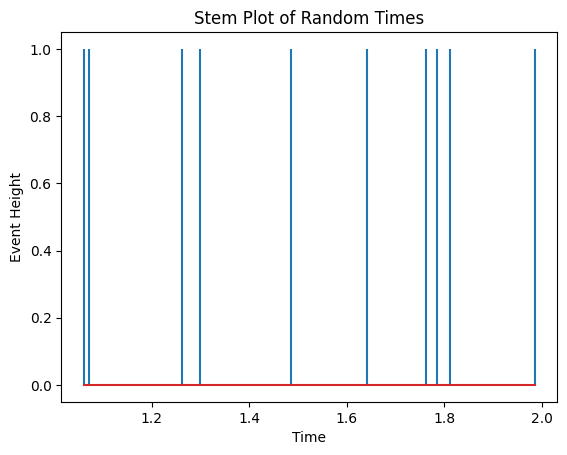

In [31]:
intervals = randintervals(10,10,1)
plotflash(intervals)

q4

# 1c

The two methods produce statistically equivalent photon arrivals overall but differ in appearance.
The randtimes method scatters N events uniformly over the interval.
The randintervals method has time differences betwen events drawn from a exponential distribution. 
This results in periods with many closely spaced events and other periods with long gaps.  

Noting that to actually see the flash of light, a certain threshold number of photons must be seen in a time interval, but if the arrivals of photons are probabalistic, so is the percieving of the photons. Seeing the flash is "inherently" probabalistic.

# 2a

In [32]:
def poisson_pdf(n, lambd, T):
    """
    Compute Poisson probability for n events in time T
    """
    mu = lambd * T
    
    poisson = ((mu**n)/(np.math.factorial(n))) * np.exp(-mu)

    return poisson

C:\Users\Ryan\AppData\Local\Temp\ipykernel_8976\1394053765.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poisson = ((mu**n)/(np.math.factorial(n))) * np.exp(-mu)


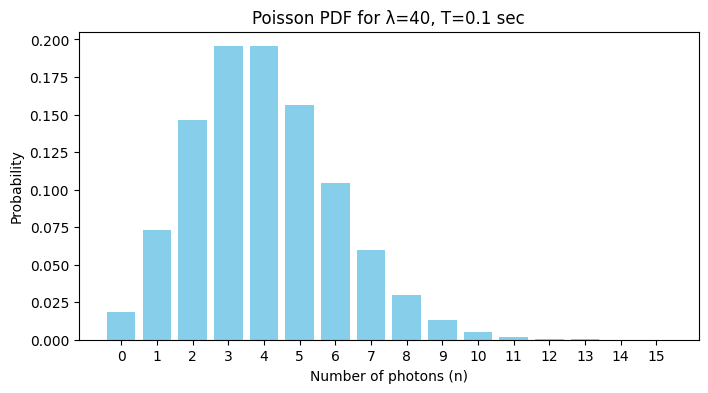

In [33]:
# Let’s plot the pdf for n = 0 to 15 for a given rate.
lam_rate = 40   # events per second, say
T = 0.1         # 100 msec
n_values = np.arange(0, 16)
pdf_vals = [poisson_pdf(n, lambd=lam_rate, T=T) for n in n_values]


plt.figure(figsize=(8,4))
plt.bar(n_values, pdf_vals, color='skyblue')
plt.xlabel('Number of photons (n)')
plt.ylabel('Probability')
plt.title('Poisson PDF for λ=40, T=0.1 sec')
plt.xticks(n_values)
plt.show()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_8976\1394053765.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poisson = ((mu**n)/(np.math.factorial(n))) * np.exp(-mu)


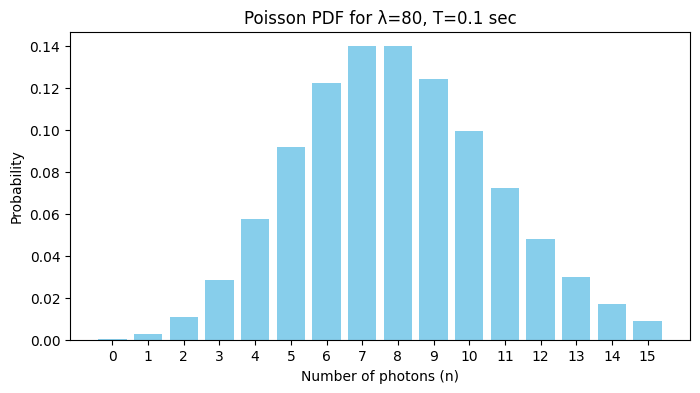

In [34]:
# And for fun lets just double the photon rate to see if the probabilities go up twice as much.

lam_rate = 80   # events per second, say
T = 0.1         # 100 msec
n_values = np.arange(0, 16)
pdf_vals = [poisson_pdf(n, lambd=lam_rate, T=T) for n in n_values]


plt.figure(figsize=(8,4))
plt.bar(n_values, pdf_vals, color='skyblue')
plt.xlabel('Number of photons (n)')
plt.ylabel('Probability')
plt.title('Poisson PDF for λ=80, T=0.1 sec')
plt.xticks(n_values)
plt.show()

As you can observe, the mean of the distribution shifted almost to twice as much photons.

q4

In [35]:
lam_rate = 10
T = .1

probability_3_photons = poisson_pdf(3, lam_rate, T)

print(probability_3_photons)

0.061313240195240384


C:\Users\Ryan\AppData\Local\Temp\ipykernel_8976\1394053765.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poisson = ((mu**n)/(np.math.factorial(n))) * np.exp(-mu)


q5

C:\Users\Ryan\AppData\Local\Temp\ipykernel_8976\1394053765.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poisson = ((mu**n)/(np.math.factorial(n))) * np.exp(-mu)


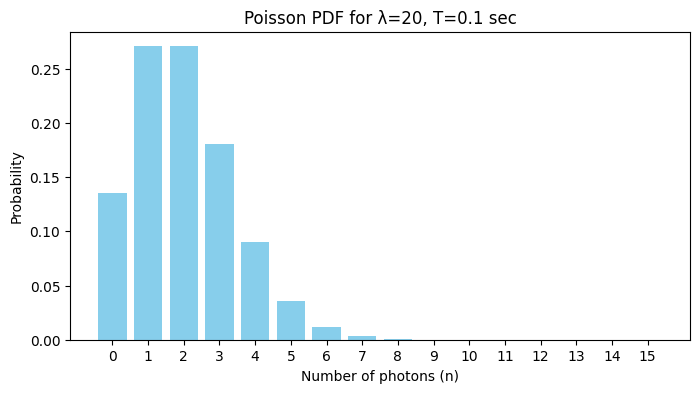

In [36]:
# And for fun lets just double the photon rate to see if the probabilities go up twice as much.

lam_rate = 20   # events per second, say
T = 0.1         # 100 msec
n_values = np.arange(0, 16)
pdf_vals = [poisson_pdf(n, lambd=lam_rate, T=T) for n in n_values]


plt.figure(figsize=(8,4))
plt.bar(n_values, pdf_vals, color='skyblue')
plt.xlabel('Number of photons (n)')
plt.ylabel('Probability')
plt.title('Poisson PDF for λ=20, T=0.1 sec')
plt.xticks(n_values)
plt.show()

# 2b

In [37]:
from scipy.stats import poisson

def detectionprob(K, lambd=40, T=0.1):
    """
    Probability of detecting the flash
    """

    mu = lambd * T

    if(K <=0):
        return 1

    return 1.0 - poisson.cdf(K-1, mu) 

q6

In [46]:
detection_probability = detectionprob(6,40,.1)
print(detection_probability)

0.21486961296959484


q7

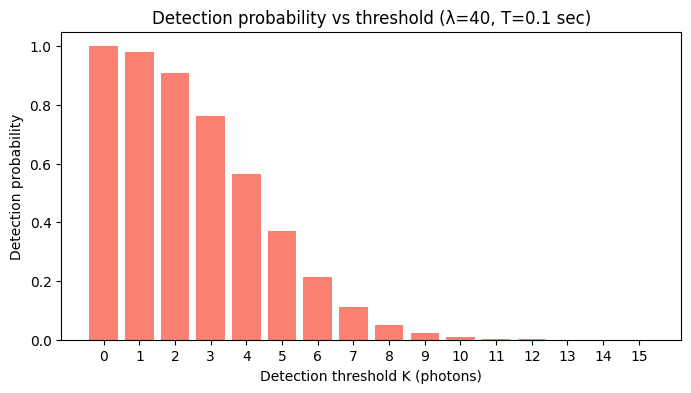

In [47]:
# Let’s plot the detection probability as a function of the threshold K.
K_values = np.arange(0, 16)
det_prob_values = [detectionprob(K, lambd=40, T=0.1) for K in K_values]

plt.figure(figsize=(8,4))
plt.bar(K_values, det_prob_values, color='salmon')
plt.xlabel('Detection threshold K (photons)')
plt.ylabel('Detection probability')
plt.title('Detection probability vs threshold (λ=40, T=0.1 sec)')
plt.xticks(K_values)
plt.show()

# 3a

In [40]:
def lightflash(lambd, t1=0.8, t2=2.2):
    """
    Simulate a Poisson process with rate `lambd` within the interval [t1, t2].
    
    lambd - Poisson rate (events per unit time)
    t1, t2 - Start and end time of the process
    """
    T = t2 - t1  # Duration of process

    # Sample the number of events from a Poisson distribution
    N = np.random.poisson(lambd * T)  # Number of events
    
    # Generate random event times
    event_times = randtimes(N, t1, t2)

    # Return sorted event times
    return np.sort(event_times)

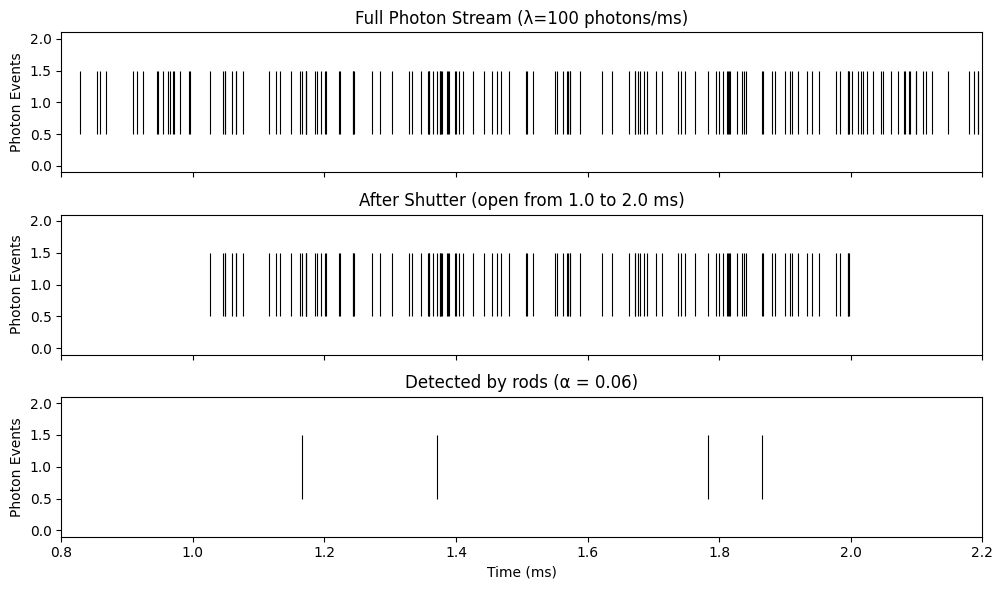

In [41]:
def plotflash(photon_times, ax):
    """
    Plot photon arrival times as vertical lines.
    
    photon_times: array of arrival times
    ax: matplotlib axis object
    """
    ax.eventplot(photon_times, orientation='horizontal', colors='black', linewidths=0.8)
    ax.set_ylabel("Photon Events")

def simulate_flash():
    """
    Simulate a flash of light with three stages:
    1. Full photon stream.
    2. Photons passing through a shutter that is open from s1 to s2.
    3. Photons detected by rods (each photon is detected with probability α).
    
    The simulation is done in milliseconds.
    """
    # Parameters
    lam = 100        # photon rate: 100 photons per ms
    full_t1, full_t2 = 0.8, 2.2  # flash interval in ms
    s1, s2 = 1.0, 2.0            # shutter open from 1 to 2 ms
    alpha = 0.06               # fraction absorbed/detected by rods
    
    # Generate full photon stream
    full_stream = lightflash(lam, t1=full_t1, t2=full_t2)

    # Photons passing through shutter: those events between s1 and s2.
    shutter_stream = full_stream[(full_stream >= s1) & (full_stream <= s2)]
    
    # Detected photons: each photon from the shutter stream is detected with probability α.
    detected_stream = shutter_stream[np.random.rand(len(shutter_stream)) < alpha]
    
    # Create subplots with aligned x-axes (in ms)
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
    
    # Plot full stream
    plotflash(full_stream, ax=axes[0])
    axes[0].set_title("Full Photon Stream (λ=100 photons/ms)")
    axes[0].set_xlim(full_t1, full_t2)
    
    # Plot after shutter
    plotflash(shutter_stream, ax=axes[1])
    axes[1].set_title("After Shutter (open from %.1f to %.1f ms)" % (s1, s2))
    
    # Plot detected photons
    plotflash(detected_stream, ax=axes[2])
    axes[2].set_title("Detected by rods (α = %.2f)" % alpha)
    axes[2].set_xlabel("Time (ms)")
    
    plt.tight_layout()
 

simulate_flash()

**I** is the number of photons. $Photons$

**lambda** is the number of photons per period. $\frac{Photons}{msec}$

**T** is time interval $msec$

**alpha** is the absorbtion rate. $\frac{Photons}{msec}$

**K** is the threshhold for detecting the light per period. $Photons$



In [42]:
# 3c. Plot the percent of flashes detected as a function of light intensity I.
def plotdetectioncurve(alpha=0.5, K=6, ax=None, label=None):
    """
    Plot the detection probability as a function of intensity I.
    I is the total number of photons arriving at the cornea.
    The x-axis is on a logarithmic scale and ranges from 0.01 to 100.
    """
    I_values = np.logspace(-2, 3, 200)
    prob_values = [probseeing(I, alpha=alpha, K=K) for I in I_values]
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(I_values, np.array(prob_values)*100, label=label)
    ax.set_xscale('log')
    ax.set_xlabel("Light intensity I (photons at cornea)")
    ax.set_ylabel("Detection probability (%)")
    ax.set_title("Detection Curve (α=%.2f, K=%d)" % (alpha, K))
    ax.grid(True, which="both", ls="--")
    return ax



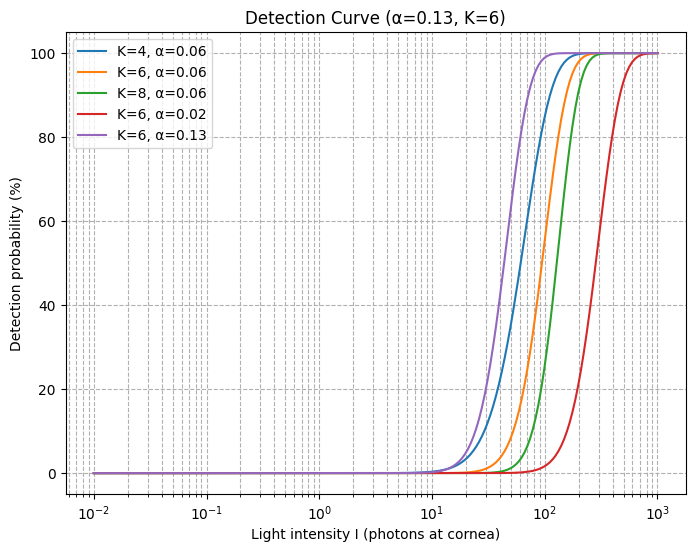

In [43]:
# Let’s overlay a few curves to see the effects of varying α and K.
fig, ax = plt.subplots(figsize=(8,6))
# Changing K changes the curve's shape:
plotdetectioncurve(alpha=0.06, K=4, ax=ax, label="K=4, α=0.06")
plotdetectioncurve(alpha=0.06, K=6, ax=ax, label="K=6, α=0.06")
plotdetectioncurve(alpha=0.06, K=8, ax=ax, label="K=8, α=0.06")
# Changing α mostly shifts the curve:
plotdetectioncurve(alpha=0.02, K=6, ax=ax, label="K=6, α=0.02")
plotdetectioncurve(alpha=0.13, K=6, ax=ax, label="K=6, α=0.13")
ax.legend()
plt.show()


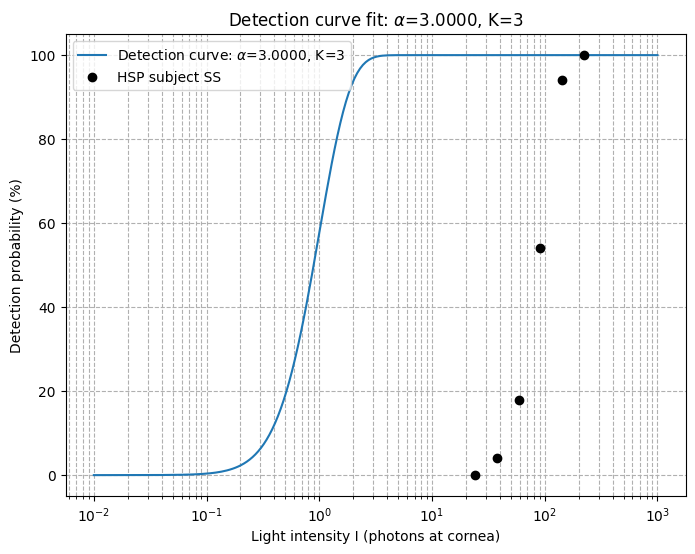

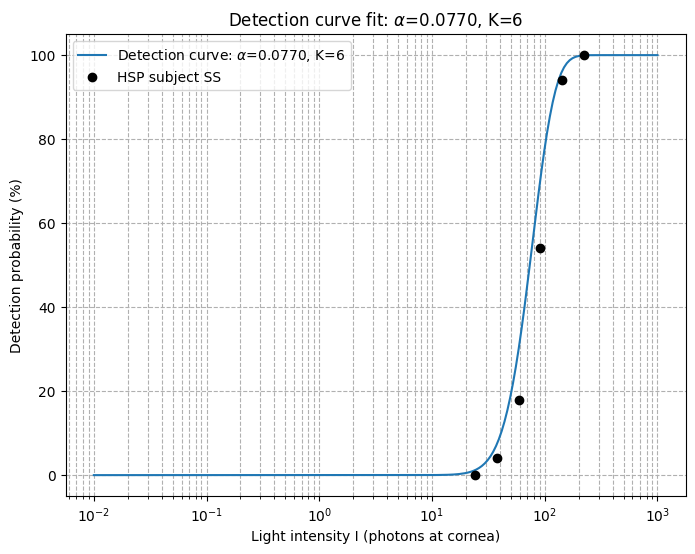

In [44]:
plotfit(alpha=3,K=3)
plotfit(alpha=.077,K=6)